<a href="https://colab.research.google.com/github/dmitriy5143/test_case_ML_bioinformatics_BIOCAD/blob/main/%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_ML_%D0%B1%D0%B8%D0%BE%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving skempi_v2.csv to skempi_v2.csv


In [54]:
import pandas as pd
import csv
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных

In [116]:
df = pd.read_csv('skempi_v2.csv', sep=';', engine='python', quoting=csv.QUOTE_NONE, on_bad_lines='skip')

In [48]:
df

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_proteins,Affinity_mut (M),Affinity_wt (M),Protein 1,Protein 2,Temperature,Method
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,5.260000e-11,1.120000e-12,Subtilisin Carlsberg,Eglin c,294.0,IASP
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,8.330000e-12,1.120000e-12,Subtilisin Carlsberg,Eglin c,294.0,IASP
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,1.020000e-07,1.120000e-12,Subtilisin Carlsberg,Eglin c,294.0,IASP
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,1.720000e-10,1.120000e-12,Subtilisin Carlsberg,Eglin c,294.0,IASP
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,1.920000e-09,1.120000e-12,Subtilisin Carlsberg,Eglin c,294.0,IASP
...,...,...,...,...,...,...,...,...,...,...,...
7080,3QIB_ABP_CD,KP9R,KP8R,COR,"TCR/pMHC,1JCK_A_B",2.400000e-04,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298.0,SPR
7081,3QIB_ABP_CD,TP12A,TP11A,COR,"TCR/pMHC,1JCK_A_B",1.100000e-03,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298.0,SPR
7082,3QIB_ABP_CD,TP12S,TP11S,COR,"TCR/pMHC,1JCK_A_B",3.380000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298.0,SPR
7083,3QIB_ABP_CD,TP12N,TP11N,COR,"TCR/pMHC,1JCK_A_B",4.340000e-05,5.500000e-06,I-Ek plus MCC peptide,2B4 TCR,298.0,SPR


In [12]:
df.head()

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_mut_parsed,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1


In [14]:
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())


Количество пропущенных значений по столбцам:
#Pdb                               0
Mutation(s)_PDB                    0
Mutation(s)_cleaned                0
iMutation_Location(s)              0
Hold_out_type                   3774
Hold_out_proteins                  0
Affinity_mut (M)                   0
Affinity_mut_parsed              285
Affinity_wt (M)                    0
Affinity_wt_parsed                 2
Reference                          0
Protein 1                          0
Protein 2                          0
Temperature                        4
kon_mut (M^(-1)s^(-1))          5241
kon_mut_parsed                  5241
kon_wt (M^(-1)s^(-1))           5232
kon_wt_parsed                   5232
koff_mut (s^(-1))               5241
koff_mut_parsed                 5241
koff_wt (s^(-1))                5225
koff_wt_parsed                  5225
dH_mut (kcal mol^(-1))          6642
dH_wt (kcal mol^(-1))           6642
dS_mut (cal mol^(-1) K^(-1))    6642
dS_wt (cal mol^(-1) K^(-1))  

# Очистка данных

In [117]:
columns_to_drop = [
    'Affinity_mut_parsed', 'Affinity_wt_parsed',
    'kon_mut (M^(-1)s^(-1))', 'kon_mut_parsed',
    'kon_wt (M^(-1)s^(-1))', 'kon_wt_parsed',
    'koff_mut (s^(-1))', 'koff_mut_parsed',
    'koff_wt (s^(-1))', 'koff_wt_parsed',
    'dH_mut (kcal mol^(-1))', 'dH_wt (kcal mol^(-1))',
    'dS_mut (cal mol^(-1) K^(-1))', 'dS_wt (cal mol^(-1) K^(-1))',
    'Notes', 'Hold_out_type', 'SKEMPI version', 'Reference']

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
print(df.shape)
print(df.isnull().sum())

(7085, 11)
#Pdb                     0
Mutation(s)_PDB          0
Mutation(s)_cleaned      0
iMutation_Location(s)    0
Hold_out_proteins        0
Affinity_mut (M)         0
Affinity_wt (M)          0
Protein 1                0
Protein 2                0
Temperature              4
Method                   0
dtype: int64


In [118]:
def safe_to_float(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)

        if not isinstance(x, str):
            x = str(x)

        match = re.search(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", x)
        if match:
            return float(match.group(0))
        else:
            return np.nan
    except Exception as e:
        return np.nan

In [119]:
affinity_cols = ['Affinity_mut (M)', 'Affinity_wt (M)']

for col in affinity_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].apply(safe_to_float)

print("\nКоличество пропусков в столбцах аффинитетов после преобразования:")
for col in affinity_cols:
    missing_count = df[col].isna().sum()
    print(f"{col}: {missing_count}")


Количество пропусков в столбцах аффинитетов после преобразования:
Affinity_mut (M): 285
Affinity_wt (M): 2


In [120]:
def clean_temperature(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)
        if not isinstance(x, str):
            x = str(x)
        match = re.search(r"[-+]?\d*\.?\d+", x)
        if match:
            return float(match.group(0))
        else:
            return np.nan
    except Exception as e:
        return np.nan

df['Temperature'] = df['Temperature'].astype(str).str.strip()
df['Temperature'] = df['Temperature'].apply(clean_temperature)

In [121]:
df = df.dropna(subset=['Affinity_mut (M)', 'Affinity_wt (M)', 'Temperature'])
print("\nРазмер набора данных после удаления строк с пропусками:", df.shape)


Размер набора данных после удаления строк с пропусками: (6794, 11)


# обработка предикторов

In [122]:
R_cal = 8.314
conversion = 1 / 4184
T_fixed = 273.15 + 25.0

def calc_deltaG(kd):
    return (R_cal * T_fixed * conversion) * np.log(kd)

df['DeltaG_wt'] = calc_deltaG(df['Affinity_wt (M)'])
df['DeltaG_mut'] = calc_deltaG(df['Affinity_mut (M)'])

df['DeltaDeltaG'] = df['DeltaG_mut'] - df['DeltaG_wt']

# Определение целевой переменной:
#    target = 0, если ΔΔG < 0 (стабилизирующая мутация)
#    target = 1, если ΔΔG > 0 (дестабилизирующая мутация)
df['target'] = (df['DeltaDeltaG'] > 0).astype(int)

In [123]:
# Используется информация фичи "Mutation(s)_cleaned".
# В этом столбце записана информация о мутации, например "LI38G":
#   - Первая буквы определяют исходные аминокислоты
#   - Число указывает позицию
#   - Последняя буква определяет мутирующую аминокислоту

def parse_mutation(mut_str):
    if not isinstance(mut_str, str):
        return 0, "", "", []
    mutations = [m.strip() for m in mut_str.split(',')]
    count = len(mutations)
    orig_list = []
    mut_list = []
    pos_list = []

    for m in mutations:
        match = re.match(r"([A-Z]+)(\d+)([A-Z])", m)
        if match:
            orig, pos, mut = match.groups()
            orig_list.append(orig)
            mut_list.append(mut)
            try:
                pos_list.append(int(pos))
            except:
                pos_list.append(np.nan)
        else:
            orig_list.append(np.nan)
            mut_list.append(np.nan)
            pos_list.append(np.nan)
    return count, ",".join(orig_list), ",".join(mut_list), pos_list

mutation_info = df['Mutation(s)_cleaned'].apply(parse_mutation)
df['num_mutations'] = mutation_info.apply(lambda x: x[0])
df['orig_aa'] = mutation_info.apply(lambda x: x[1])
df['mut_aa'] = mutation_info.apply(lambda x: x[2])
df['positions'] = mutation_info.apply(lambda x: ",".join(map(str, x[3])) if x[3] else "")

In [128]:
def process_data(df):
    data = df.copy()

    if 'Method' in data.columns:
        method_counts = data['Method'].value_counts()
        threshold_percent = 0.15
        threshold_count = int(len(data) * threshold_percent)
        common_methods = method_counts[method_counts >= threshold_count].index.tolist()

        def group_rare_methods(method):
            return method if method in common_methods else "Other"

        data['Method_grouped'] = data['Method'].apply(group_rare_methods)

        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        method_grouped_encoded = ohe.fit_transform(data[['Method_grouped']])
        method_grouped_df = pd.DataFrame(
            method_grouped_encoded,
            columns=ohe.get_feature_names_out(['Method_grouped'])
        )

    selected_cols = ['Temperature', 'num_mutations', 'orig_aa', 'mut_aa', 'positions']
    selected_cols.append('target')
    df_model = data[selected_cols].copy()

    if 'Method' in data.columns:
        df_model = pd.concat([df_model.reset_index(drop=True),
                             method_grouped_df.reset_index(drop=True)], axis=1)

    def frequency_encoding(series):
        freq = series.value_counts(normalize=True)
        return series.map(freq)

    for col in ['orig_aa', 'mut_aa', 'positions']:
        df_model[f'{col}_freq'] = frequency_encoding(df_model[col])

    df_model.drop(['orig_aa', 'mut_aa', 'positions'], axis=1, inplace=True)

    return df_model

df_model = process_data(df)

**Отобранные признаки**
Идентификаторы (например, #Pdb, Protein 1, Protein 2) не используются так как не несут предиктивной информации, производные величины ΔG ΔΔG не используются так как учтены в метке класса.
**Учитывались:**
Температура так как функционально связана
Экспериментальный метод так как обсулавливает погрешность измерения и прочие систематические различия
`num_mutations`, `orig_aa`, `mut_aa`, `positions` — позволяют, после частотной обработки, выделить физико-химические характеристики изменения комплекса.

# тест ML моделей

In [65]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Тестирование набора популярных моделей для табличных данных

CatBoost - CV F1-scores: [0.78071334 0.77578177 0.77726976 0.77114754 0.77278732], Mean: 0.7755
RandomForest - CV F1-scores: [0.84272997 0.83050847 0.83786982 0.83431953 0.84866123], Mean: 0.8388
XGBoost - CV F1-scores: [0.79922027 0.78851175 0.79716677 0.77920411 0.7905189 ], Mean: 0.7909
LightGBM - CV F1-scores: [0.77260638 0.77248677 0.7842623  0.76512687 0.7846952 ], Mean: 0.7758


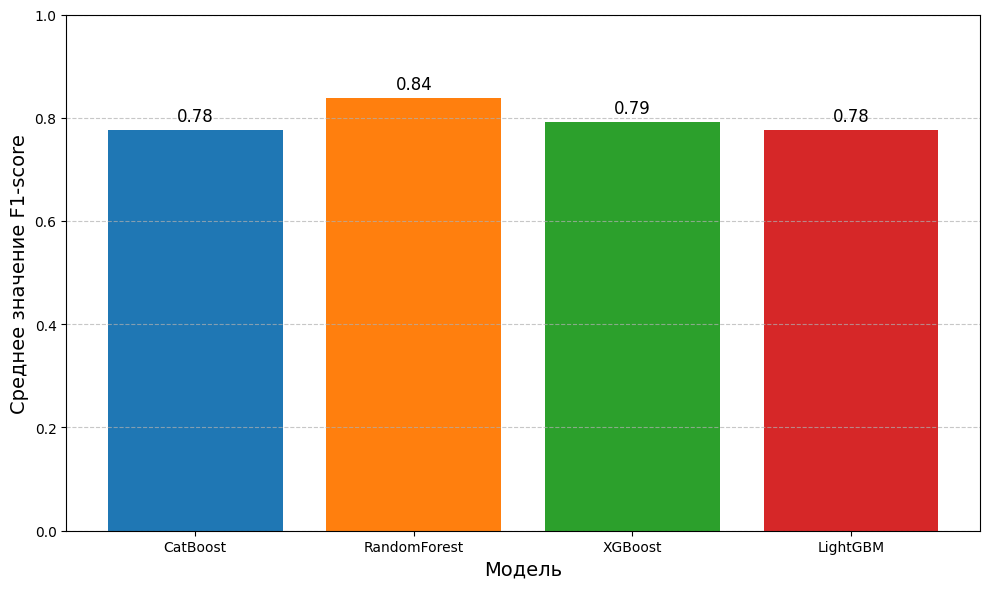

In [141]:
y = df_model['target'].copy()
X = df_model[['Temperature', 'num_mutations', 'Method_grouped_FL', 'Method_grouped_Other', 'Method_grouped_SPR', 'orig_aa_freq', 'mut_aa_freq', 'positions_freq']].copy()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, scale_pos_weight])
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
lgbm_model = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

models = {
    "CatBoost": cat_model,
    "RandomForest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scorer = make_scorer(f1_score)
model_scores = {}
mean_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer, n_jobs=-1)
    model_scores[model_name] = scores
    mean_scores[model_name] = scores.mean()
    print(f"{model_name} - CV F1-scores: {scores}, Mean: {scores.mean():.4f}")


plt.figure(figsize=(10, 6))
model_names = list(mean_scores.keys())
f1_means = list(mean_scores.values())

bars = plt.bar(model_names, f1_means, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.xlabel("Модель", fontsize=14)
plt.ylabel("Среднее значение F1-score", fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Как видно наилучшей моделью по кросс валидации с учетом метрики fi-score из за дисбаланса классов лучшей моделью оказывается случайный лес.

# Инференс лучшей модели + тюнинг гиперпараметров модели

In [148]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

def tune_random_forest(X, y, n_splits=5, test_size=0.2, random_state=42):
    print("Начинаем тюнинг Random Forest с использованием GridSearchCV и StratifiedShuffleSplit...")
    start_time = time.time()

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(random_state=random_state, class_weight='balanced')
    cv = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)
    elapsed_time = time.time() - start_time
    print(f"Тюнинг завершен за {elapsed_time:.2f} секунд")
    print("\nЛучшие гиперпараметры:")
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")

    print(f"\nЛучший F1-score при кросс-валидации: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    print("\nОценка лучшей модели с помощью StratifiedShuffleSplit:")
    metrics = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score,
        'roc_auc': roc_auc_score
    }
    cv_metric = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    results = {metric: [] for metric in metrics}

    for train_idx, test_idx in cv_metric.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]

        results['accuracy'].append(metrics['accuracy'](y_test, y_pred))
        results['precision'].append(metrics['precision'](y_test, y_pred))
        results['recall'].append(metrics['recall'](y_test, y_pred))
        results['f1'].append(metrics['f1'](y_test, y_pred))
        results['roc_auc'].append(metrics['roc_auc'](y_test, y_prob))

    print(f"Accuracy: {np.mean(results['accuracy']):.4f} ± {np.std(results['accuracy']):.4f}")
    print(f"Precision: {np.mean(results['precision']):.4f} ± {np.std(results['precision']):.4f}")
    print(f"Recall: {np.mean(results['recall']):.4f} ± {np.std(results['recall']):.4f}")
    print(f"F1 Score: {np.mean(results['f1']):.4f} ± {np.std(results['f1']):.4f}")
    print(f"ROC AUC: {np.mean(results['roc_auc']):.4f} ± {np.std(results['roc_auc']):.4f}")

    return best_model

best_rf_model = tune_random_forest(X, y, n_splits=5, test_size=0.2)

Начинаем тюнинг Random Forest с использованием GridSearchCV и StratifiedShuffleSplit...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Тюнинг завершен за 129.94 секунд

Лучшие гиперпараметры:
max_depth: 20
max_features: log2
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100

Лучший F1-score при кросс-валидации: 0.8461

Оценка лучшей модели с помощью StratifiedShuffleSplit:
Accuracy: 0.7616 ± 0.0128
Precision: 0.8297 ± 0.0084
Recall: 0.8632 ± 0.0086
F1 Score: 0.8461 ± 0.0082
ROC AUC: 0.7385 ± 0.0164
